In [ ]:
import tensorflow_datasets as tfds

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
(ds_train, ds_test), ds_info = tfds.load('cats_vs_dogs', split=['train[0:80%]', 'train[80%:]' ], with_info=True,  as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete2EWGAC/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
def normalize_img(image, label):
  image = tf.cast(image, tf.float32)
  # Normalize the pixel values
  image = image / 255.0
  # Resize the image
  image = tf.image.resize(image, (150, 150))
  return image, label


In [ ]:
def normalize_img_test(image, label):
  image = tf.cast(image, tf.float32)
  # Normalize the pixel values
  image = image / 255.0
  # Resize the image
  image = tf.image.resize(image, (150, 150))
  noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=.3, dtype=tf.float32)
  image = tf.add(image, noise)
  return image, label


In [ ]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
ds_test = ds_test.map(
    normalize_img_test, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      ds_train,
      epochs=10,
      validation_data=ds_test,
      verbose=1)



Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/10
146/146 [==============================] - 21s 144ms/step - loss: 0.7120 - acc: 0.6054 - val_loss: 2.2218 - val_acc: 0.5120
Epoch 2/10
146/146 [==============================] - 8s 54ms/step - loss: 0.5691 - acc: 0.7040 - val_loss: 0.9113 - val_acc: 0.6103
Epoch 3/10
146/146 [==============================] - 8s 55ms/step - loss: 0.5030 - acc: 0.7563 - val_loss: 0.9619 - val_acc: 0.5942
Epoch 4/10
146/146 [==============================] - 8s 54ms/step - loss: 0.4464 - acc: 0.7902 - val_loss: 1.1964 - val_acc: 0.5819
Epoch 5/10
146/146 [==============================] - 8s 54ms/step - loss: 0.3955 - acc: 0.8200 - val_loss: 1.1044 - val_acc: 0.5798
Epoch 6/10
146/146 [==============================] - 8s 55ms/step - loss: 0.3601 - acc: 0.8418 - val_loss: 1.2306 - val_acc: 0.5606
Epoch 7/10
146/146 [==============================] - 8s 55ms/step - loss: 0.3072 - acc: 0.8681 - val_loss: 0.7615 - val_acc: 0.6071
Epoch 8/10
146/146 [==============================] - 8s 55ms/step 

Text(0.5, 1.0, 'Training and validation loss')

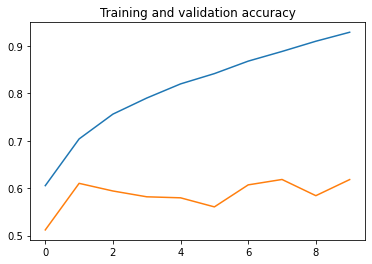

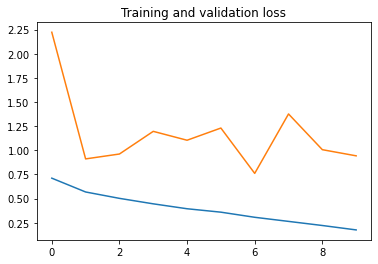

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
!mkdir -p saved_model
model.save('saved_model/2nd_model')

INFO:tensorflow:Assets written to: saved_model/2nd_model/assets


INFO:tensorflow:Assets written to: saved_model/2nd_model/assets


In [ ]:
!zip -r /content/2nd_model.zip /content/saved_model/2nd_model/


  adding: content/saved_model/2nd_model/ (stored 0%)
  adding: content/saved_model/2nd_model/variables/ (stored 0%)
  adding: content/saved_model/2nd_model/variables/variables.index (deflated 65%)
  adding: content/saved_model/2nd_model/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/saved_model/2nd_model/assets/ (stored 0%)
  adding: content/saved_model/2nd_model/saved_model.pb (deflated 89%)


In [ ]:
from google.colab import files
files.download("/content/2nd_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ds_train.element_spec

(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})

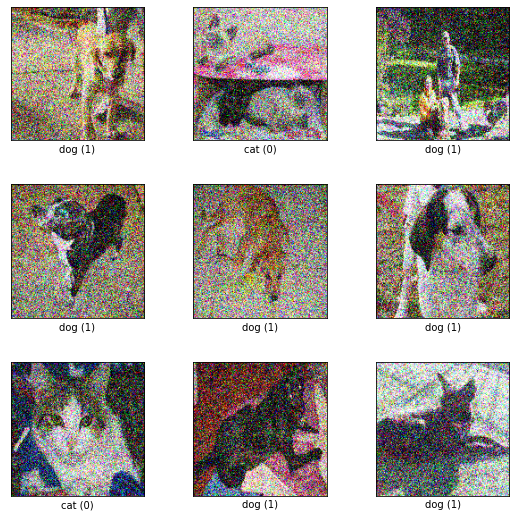

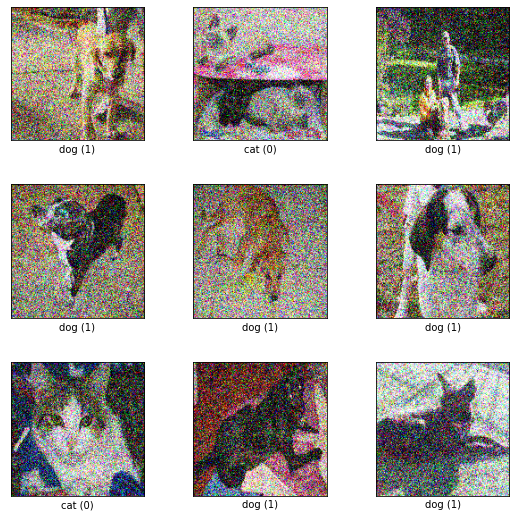

In [ ]:
tfds.show_examples(ds_test, ds_info)

NameError: ignored

In [ ]:

ds_test = ds_test.take(1)  # Only take a single example

for example in ds_test:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print (example[0])

tf.Tensor(
[[[111  76  34]
  [114  79  37]
  [120  83  39]
  ...
  [ 93  83  81]
  [ 97  88  83]
  [ 94  85  80]]

 [[119  84  42]
  [121  86  44]
  [122  87  45]
  ...
  [ 91  81  79]
  [ 94  85  80]
  [ 92  83  78]]

 [[120  87  46]
  [121  88  47]
  [122  89  48]
  ...
  [ 93  83  81]
  [ 95  86  81]
  [ 94  85  80]]

 ...

 [[132 120  98]
  [136 124 102]
  [140 128 106]
  ...
  [124 107  77]
  [128 111  81]
  [129 112  82]]

 [[136 124 102]
  [141 129 107]
  [138 126 104]
  ...
  [124 107  77]
  [121 104  76]
  [127 110  82]]

 [[139 127 105]
  [135 123 101]
  [139 127 105]
  ...
  [129 112  82]
  [120 103  75]
  [131 114  86]]], shape=(176, 168, 3), dtype=uint8)


In [ ]:
ds_test.take(-1)

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
noise = tf.random(shape=tf.shape(x), mean=0.0, stddev=1, dtype=tf.float32)
noise_img = tf.add(x, noise)

NameError: ignored

TypeError: ignored

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-12-10 19:15:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   145MB/s    in 0.5s    

2020-12-10 19:15:32 (145 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
ds_info


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye